In [1]:

!pip install imblearn
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.patches as mpatches
import time
import collections
import random
import warnings
import csv
import pprint



from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, confusion_matrix, precision_score,recall_score, f1_score, roc_auc_score, accuracy_score

from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced

from collections import Counter, OrderedDict

from scipy import stats
from scipy.stats import chi2, norm














cab_data = list(csv.DictReader(open('Cab_Data.csv')))
pprint.pprint(cab_data[0])
cab_data_columns=csv.DictReader(open('Cab_Data.csv'))
Transaction_ID1=[]
Date_of_Travel1=[]
Company1=[]
City1=[]
KM_Travelled1=[]
Price_Charged1=[]
Cost_of_Trip1=[]
Profit_per_KM1=[]
Date1=[]
Year1=[]
Customer_ID1=[]
Payment_Mode1=[]
Gender1=[]
Age1=[]
Income1=[]
for col in cab_data_columns:
    Transaction_ID1.append(col['Transaction_ID'])
    Date_of_Travel1.append(col['Date_of_Travel'])
    Company1.append(col['Company'])
    City1.append(col['City'])
    KM_Travelled1.append(col['KM_Travelled'])
    Price_Charged1.append(col['Price_Charged'])
    Cost_of_Trip1.append(col['Cost_of_Trip'])
    Profit_per_KM1.append(col['Profit_per_KM'])
    Date1.append(col['Date'])
    Year1.append(col['Year'])
    Customer_ID1.append(['Customer_ID'])
    Payment_Mode1.append(['Payment_Mode'])
    Gender1.append(['Gender'])
    Age1.append(['Age'])
    Income1.append(['Income(USD/Month)'])
    
    


df1 = pd.read_csv('Cab_Data.csv')

# cat_columns1 = df1.select_dtypes(['object']).columns


# df1[cat_columns1] = df1[cat_columns1].apply(lambda x: pd.factorize(x)[0])



city_data = list(csv.DictReader(open('City.csv')))
pprint.pprint(city_data[0])
city_data_columns=csv.DictReader(open('City.csv'))
City_1=[]
Population1=[]
Users1=[]
Population_per_User1=[]

Population_per_User1=[]
for col in city_data_columns:
    City_1.append(col['City'])
    Population1.append(col['Population'])
    Users1.append(col['Users'])
    Population_per_User1.append(col['Population_per_User'])



df2 = pd.read_csv('City.csv')

# cat_columns2 = df2.select_dtypes(['object']).columns


# df2[cat_columns2] = df2[cat_columns2].apply(lambda x: pd.factorize(x)[0])










{'Age': '36',
 'City': 'CHICAGO IL',
 'Company': 'Yellow Cab',
 'Cost_of_Trip': '483.516',
 'Customer_ID': '5867',
 'Date': '31-Jan-16',
 'Date_of_Travel': '42371',
 'Gender': 'Male',
 'Income(USD/Month)': '2103',
 'KM_Travelled': '36.3',
 'Payment_Mode': 'Card',
 'Price_Charged': '761.2',
 'Profit_per_KM': '7.65',
 'Transaction_ID': '10000564',
 'Year': '2016'}
{'City': 'NEW YORK NY',
 'Population': '8405837',
 'Population_per_User': '27.82',
 'Users': '302149'}


In [2]:
#Hyphotesis and assumptions:
# 1. Number of users in a city is the sum of cab users of all cab companies besides Yellow and Pink cab companies
# 2. Higher use of cab services in a specific city is direct proportionate with high density of users in the same city
# 3. Users prefer the use of card instead of cash when using a cab
# 4. The number of cab uses is increasing each year
# 5. The majority of users are coming from the younger population
# 6. The majority of users are coming from low-income individuals

In [3]:



TRANSACTION_ID='Transaction_ID'
DATE_OF_TRAVEL='Date_of_Travel'
COMPANY='Company'
CITY='City'
KM_TRAVELLED='KM_Travelled'
PRICE_CHARGED='Price_Charged'
COST_OF_TRIP='Cost_of_Trip'
PROFIT_PER_KM='Profit_per_KM'
DATE='Date'
YEAR='Year'
CUSTOMER_ID='Customer_ID'
PAYMENT_MODE='Payment_Mode'
GENDER='Gender'
AGE='Age'
INCOME='Income(USD/Month)'


CITY='City'
POPULATION='Population'
USERS='Users'
POPULATION_PER_USER='Population_per_User'



In [4]:
print(df1)
print(df2)

        Transaction_ID  Date_of_Travel     Company           City  \
0             10000564           42371  Yellow Cab     CHICAGO IL   
1             10000392           42371  Yellow Cab     ATLANTA GA   
2             10000402           42371  Yellow Cab     ATLANTA GA   
3             10000975           42371  Yellow Cab    NEW YORK NY   
4             10000663           42371  Yellow Cab      DALLAS TX   
...                ...             ...         ...            ...   
344948        10418317           43436  Yellow Cab    NEW YORK NY   
344949        10419486           43436  Yellow Cab  WASHINGTON DC   
344950        10418782           43436  Yellow Cab    NEW YORK NY   
344951        10416013           43436    Pink Cab     CHICAGO IL   
344952        10419405           43436  Yellow Cab  WASHINGTON DC   

        KM_Travelled  Price_Charged  Cost_of_Trip  Profit_per_KM       Date  \
0              36.30         761.20      483.5160           7.65  31-Jan-16   
1            

In [5]:


# df1.describe()




In [6]:

# df2.describe()

In [7]:

df1.isnull().sum().max()
df1.columns

Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip', 'Profit_per_KM', 'Date', 'Year',
       'Customer_ID', 'Payment_Mode', 'Gender', 'Age', 'Income(USD/Month)'],
      dtype='object')

In [8]:
df2.isnull().sum().max()
df2.columns

Index(['City', 'Population', 'Users', 'Population_per_User'], dtype='object')

In [9]:
DEFAULT_VALUE = np.nan


def clean(data, column_key, convert_function, default_value):
    for row in data:
        old_value = row[column_key]
        new_value = default_value
        try:

                new_value = convert_function(old_value)
        except (ValueError, TypeError):
            print('Replacing {} with {} in column {}'.format(row[column_key], new_value, column_key))
        row[column_key] = new_value







clean(cab_data,TRANSACTION_ID,int,DEFAULT_VALUE)
clean(cab_data,DATE_OF_TRAVEL,int,DEFAULT_VALUE)
clean(cab_data,COMPANY,str,DEFAULT_VALUE)
clean(cab_data,CITY,str,DEFAULT_VALUE)
clean(cab_data,KM_TRAVELLED,float,DEFAULT_VALUE)
clean(cab_data,PRICE_CHARGED,float,DEFAULT_VALUE)
clean(cab_data,COST_OF_TRIP,float,DEFAULT_VALUE)
clean(cab_data,PROFIT_PER_KM,float,DEFAULT_VALUE)
# clean(cab_data,DATE,int,DEFAULT_VALUE)
clean(cab_data,YEAR,int,DEFAULT_VALUE)
clean(cab_data,CUSTOMER_ID,int,DEFAULT_VALUE)
clean(cab_data,PAYMENT_MODE,str,DEFAULT_VALUE)
clean(cab_data,GENDER,str,DEFAULT_VALUE)
clean(cab_data,AGE,int,DEFAULT_VALUE)
clean(cab_data,INCOME,int,DEFAULT_VALUE)


clean(city_data,CITY,str,DEFAULT_VALUE)
clean(city_data,POPULATION,int,DEFAULT_VALUE)
clean(city_data,USERS,int,DEFAULT_VALUE)
clean(city_data,POPULATION_PER_USER,float,DEFAULT_VALUE)

In [10]:

#Frequency distribution and mode
#frequency=the number of rows for each element for a specific feature
#mode=the most popular element of a specific feature


def print_distr(cab_data, column_key):
    print(column_key.upper())

    counts = Counter()
    for row in cab_data:
        counts[row[column_key]] += 1

    for k,v in sorted(counts.items()):
        print('* {}: {}'.format(k, v))






#print_distr(cab_data,TRANSACTION_ID)
#print_distr(cab_data,DATE_OF_TRAVEL)
print_distr(cab_data,COMPANY)
print_distr(cab_data,CITY)
#print_distr(cab_data,KM_TRAVELLED)
#print_distr(cab_data,PRICE_CHARGED)
#print_distr(cab_data,COST_OF_TRIP)
#print_distr(cab_data,PROFIT_PER_KM)
#print_distr(cab_data,DATE)
print_distr(cab_data,YEAR)
#print_distr(cab_data,CUSTOMER_ID)
print_distr(cab_data,PAYMENT_MODE)
print_distr(cab_data,GENDER)
print_distr(cab_data,AGE)
#print_distr(cab_data,INCOME)


# print_distr(city_data,CITY)
# print_distr(city_data,POPULATION)
# print_distr(city_data,USERS)
# print_distr(city_data,POPULATION_PER_USER)



COMPANY
* Pink Cab: 81214
* Yellow Cab: 263739
CITY
* ATLANTA GA: 7267
* AUSTIN TX: 4656
* BOSTON MA: 28547
* CHICAGO IL: 54563
* DALLAS TX: 6756
* DENVER CO: 3676
* LOS ANGELES CA: 46289
* MIAMI FL: 6057
* NASHVILLE TN: 2902
* NEW YORK NY: 95241
* ORANGE COUNTY: 3800
* PHOENIX AZ: 1987
* PITTSBURGH PA: 1260
* SACRAMENTO CA: 2273
* SAN DIEGO CA: 19742
* SEATTLE WA: 7728
* SILICON VALLEY: 8174
* TUCSON AZ: 1859
* WASHINGTON DC: 42176
YEAR
* 2016: 93661
* 2017: 126376
* 2018: 124916
PAYMENT_MODE
* Card: 206772
* Cash: 138181
GENDER
* Female: 147246
* Male: 197707
AGE
* 18: 10426
* 19: 11123
* 20: 11734
* 21: 10988
* 22: 11341
* 23: 11829
* 24: 10715
* 25: 11483
* 26: 11194
* 27: 11556
* 28: 10683
* 29: 10244
* 30: 10738
* 31: 10467
* 32: 11452
* 33: 10948
* 34: 11327
* 35: 10144
* 36: 10628
* 37: 10637
* 38: 10466
* 39: 11339
* 40: 11098
* 41: 3690
* 42: 3801
* 43: 3672
* 44: 3574
* 45: 4079
* 46: 3766
* 47: 3905
* 48: 3541
* 49: 4008
* 50: 3920
* 51: 3750
* 52: 3651
* 53: 3493
* 54: 365

In [11]:
# defines a new 'mode' function that takes two parameters
def mode(data, column_key):
    mode_counter = Counter()
    for row in data:
        mode_counter[row[column_key]] += 1
    return mode_counter.most_common(1)[0][0]

# example on how to use the 'mode' function





print("TRANSACTION_ID mode:", mode(cab_data,TRANSACTION_ID))
print("DATE_OF_TRAVEL mode:", mode(cab_data,DATE_OF_TRAVEL))
print("COMPANY mode:", mode(cab_data,COMPANY))
print("CITY mode:", mode(cab_data,CITY))
print("KM_TRAVELLED mode:", mode(cab_data,KM_TRAVELLED))
print("PRICE_CHARGED mode:", mode(cab_data,PRICE_CHARGED))
print("COST_OF_TRIP mode:", mode(cab_data,COST_OF_TRIP))
print("PROFIT_PER_KM mode:", mode(cab_data,PROFIT_PER_KM))
print("DATE mode:", mode(cab_data,DATE))
print("YEAR mode:", mode(cab_data,YEAR))
print("CUSTOMER_ID mode:", mode(cab_data,CUSTOMER_ID))
print("PAYMENT_MODE mode:", mode(cab_data,PAYMENT_MODE))
print("GENDER mode:", mode(cab_data,GENDER))
print("AGE mode:", mode(cab_data,AGE))
print("INCOME mode:", mode(cab_data,INCOME))


print("CITY mode:", mode(city_data,CITY))
print("POPULATION mode:", mode(city_data,POPULATION))
print("USERS mode:", mode(city_data,USERS))
print("POPULATION_PER_USER mode:", mode(city_data,POPULATION_PER_USER))



TRANSACTION_ID mode: 10000564
DATE_OF_TRAVEL mode: 43105
COMPANY mode: Yellow Cab
CITY mode: NEW YORK NY
KM_TRAVELLED mode: 33.6
PRICE_CHARGED mode: 216.37
COST_OF_TRIP mode: 362.88
PROFIT_PER_KM mode: 2.31
DATE mode: 3-Feb-18
YEAR mode: 2017
CUSTOMER_ID mode: 2766
PAYMENT_MODE mode: Card
GENDER mode: Male
AGE mode: 23
INCOME mode: 20884
CITY mode: NEW YORK NY
POPULATION mode: 8405837
USERS mode: 302149
POPULATION_PER_USER mode: 27.82


In [12]:
#Statistics with numpy
def stats(data, column):
    for column_key in [column]:
        v = [row[column_key] for row in data] # grab values
        print(column_key.upper())
        print("* Min..Max: {}..{}".format(np.nanmin(v), np.nanmax(v)))
        print("* Range: {}".format(np.nanmax(v)-np.nanmin(v)))
        print("* Mean: {}".format(np.nanmean(v)))
        print("* Standard deviation: {}".format(np.nanstd(v)))
        print("* Median: {}".format(np.nanmedian(v)))
        q1 = np.nanpercentile(v, 25)
        print("* 25th percentile (Q1): {}".format(q1))
        q3 = np.nanpercentile(v, 75)
        print("* 75th percentile (Q3): {}".format(q3))
        iqr = q3-q1
        print("* IQR: {}".format(iqr))
    stdr=np.nanstd([row[column]for row in data])




stats(cab_data,TRANSACTION_ID)
stats(cab_data,DATE_OF_TRAVEL)
# stats(cab_data,COMPANY)
# stats(cab_data,CITY)
stats(cab_data,KM_TRAVELLED)
stats(cab_data,PRICE_CHARGED)
stats(cab_data,COST_OF_TRIP)
stats(cab_data,PROFIT_PER_KM)
# stats(cab_data,DATE)
stats(cab_data,YEAR)
stats(cab_data,CUSTOMER_ID)
# stats(cab_data,PAYMENT_MODE)
# stats(cab_data,GENDER)
stats(cab_data,AGE)
stats(cab_data,INCOME)


# stats(city_data,CITY)
stats(city_data,POPULATION)
stats(city_data,USERS)
stats(city_data,POPULATION_PER_USER)

TRANSACTION_ID
* Min..Max: 10000011..10440107
* Range: 440096
* Mean: 10212086.729682015
* Standard deviation: 121978.44626894279
* Median: 10212704.0
* 25th percentile (Q1): 10106579.0
* 75th percentile (Q3): 10317070.0
* IQR: 210491.0
DATE_OF_TRAVEL
* Min..Max: 42371..43436
* Range: 1065
* Mean: 42943.68466718654
* Standard deviation: 296.8986466528104
* Median: 42969.0
* 25th percentile (Q1): 42688.0
* 75th percentile (Q3): 43188.0
* IQR: 500.0
KM_TRAVELLED
* Min..Max: 1.9..48.0
* Range: 46.1
* Mean: 22.56988757888756
* Standard deviation: 12.23267694318627
* Median: 22.44
* 25th percentile (Q1): 12.0
* 75th percentile (Q3): 32.96
* IQR: 20.96
PRICE_CHARGED
* Min..Max: 15.6..2048.03
* Range: 2032.4300000000003
* Mean: 424.2020590341293
* Standard deviation: 275.1891220111255
* Median: 386.81
* 25th percentile (Q1): 206.79
* 75th percentile (Q3): 584.74
* IQR: 377.95000000000005
COST_OF_TRIP
* Min..Max: 19.0..691.2
* Range: 672.2
* Mean: 286.2340172585831
* Standard deviation: 157.97

In [13]:
print('Male', round(df1[GENDER].value_counts()[0]/len(df1) * 100,2), '% of the dataset')
print('Female', round(df1[GENDER].value_counts()[1]/len(df1) * 100,2), '% of the dataset')

Male 57.31 % of the dataset
Female 42.69 % of the dataset


Text(0.5, 1.0, 'Gender Distributions \n ')

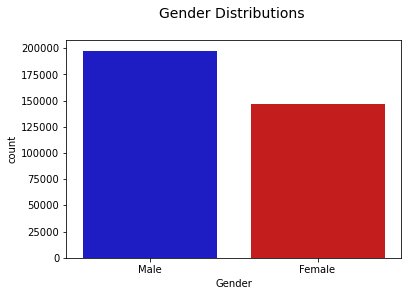

In [14]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(data=df1,x=GENDER, palette=colors)
plt.title('Gender Distributions \n ', fontsize=14)

In [15]:
print('Pink Cab', round(df1[COMPANY].value_counts()[0]/len(df1) * 100,2), '% of the dataset')
print('Yellow Cab', round(df1[COMPANY].value_counts()[1]/len(df1) * 100,2), '% of the dataset')

Pink Cab 76.46 % of the dataset
Yellow Cab 23.54 % of the dataset


Text(0.5, 1.0, 'Cab Company Distributions \n ')

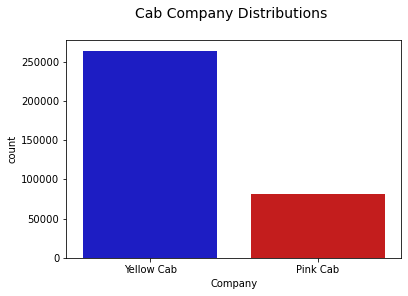

In [16]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(data=df1,x=COMPANY,  palette=colors)
plt.title('Cab Company Distributions \n ', fontsize=14)

In [17]:
# print('Card', round(df1[PAYMENT_MODE].value_counts()[0]/len(df4) * 100,2), '% of the dataset')
# print('Cash', round(df1[PAYMENT_MODE].value_counts()[1]/len(df4) * 100,2), '% of the dataset')

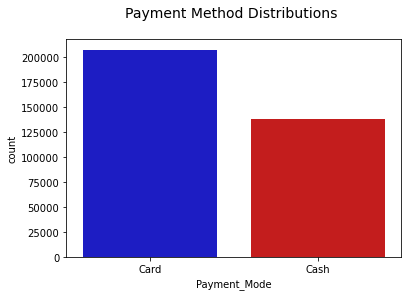

In [18]:
colors = ["#0101DF", "#DF0101"]

sns.countplot( data=df1,x=PAYMENT_MODE, palette=colors)
plt.title('Payment Method Distributions \n ', fontsize=14)
plt.show()

Text(0.5, 1.0, 'Year Distributions \n ')

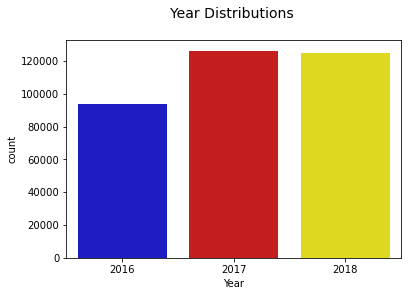

In [19]:
colors = ["#0101DF", "#DF0101","#fff600"]

sns.countplot(data=df1,x=YEAR,  palette=colors)
plt.title('Year Distributions \n ', fontsize=14)

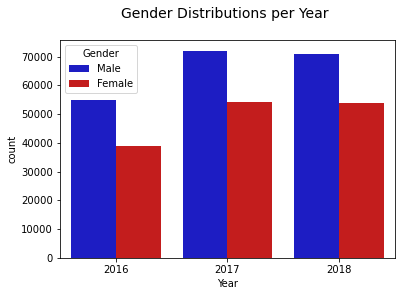

In [20]:
colors = ["#0101DF", "#DF0101"]

sns.countplot( data=df1,x=YEAR,hue=GENDER, palette=colors)

plt.title('Gender Distributions per Year \n ', fontsize=14)
plt.show()

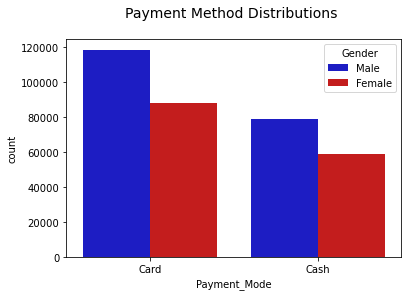

In [21]:
colors = ["#0101DF", "#DF0101"]

sns.countplot( data=df1,x=PAYMENT_MODE,hue=GENDER, palette=colors)
plt.title('Payment Method Distributions \n ', fontsize=14)
plt.show()

Text(0.5, 1.0, 'Cab Company Distributions \n ')

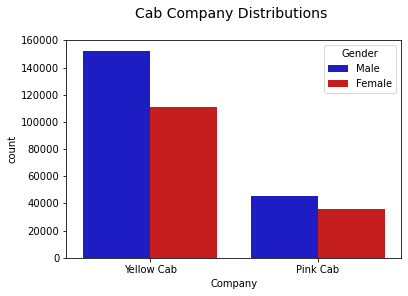

In [22]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(data=df1,x=COMPANY,hue=GENDER,  palette=colors)
plt.title('Cab Company Distributions \n ', fontsize=14)

Text(0.5, 1.0, 'Gender Distributions in Cities \n ')

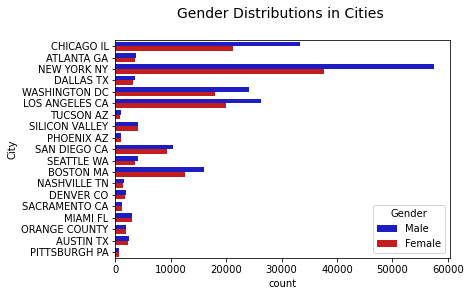

In [23]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(data=df1,y=CITY,hue=GENDER,  palette=colors)
plt.title('Gender Distributions in Cities \n ', fontsize=14)



Text(0.5, 1.0, 'Cab Company Distributions \n ')

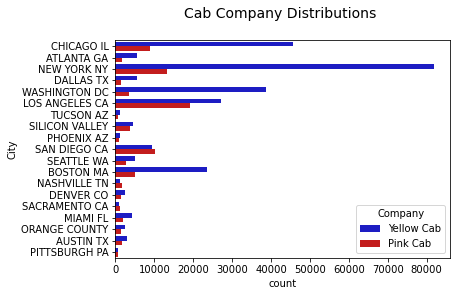

In [24]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(data=df1,y=CITY,hue=COMPANY,  palette=colors)
plt.title('Cab Company Distributions \n ', fontsize=14)



Text(0.5, 1.0, 'Cab Company Distributions \n ')

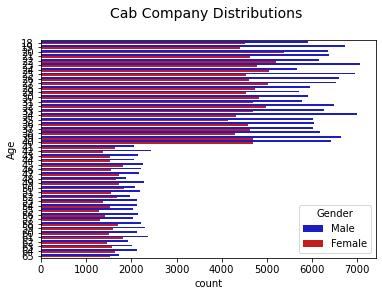

In [25]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(data=df1,y=AGE,hue=GENDER,  palette=colors)
plt.title('Cab Company Distributions \n ', fontsize=14)



Text(0.5, 1.0, 'User Density in each City  \n ')

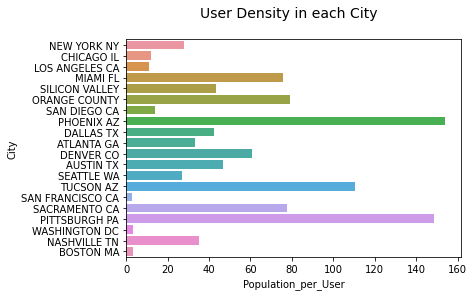

In [26]:
colors = ["#0101DF", "#DF0101"]

sns.barplot(data=df2,y=CITY,x=POPULATION_PER_USER)
plt.title('User Density in each City  \n ', fontsize=14)

<AxesSubplot:xlabel='Age', ylabel='Count'>

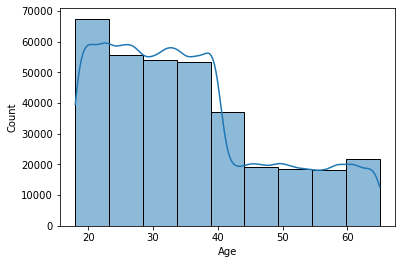

In [27]:
sns.histplot(df1[AGE],kde=True, bins =9, )

<AxesSubplot:xlabel='Income(USD/Month)', ylabel='Count'>

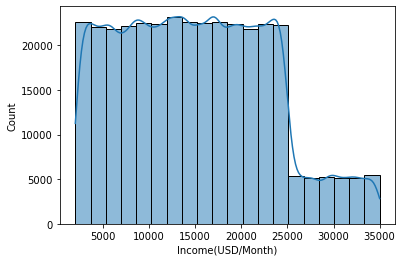

In [28]:
sns.histplot(df1[INCOME],kde=True, bins =20)

<AxesSubplot:xlabel='Age', ylabel='Count'>

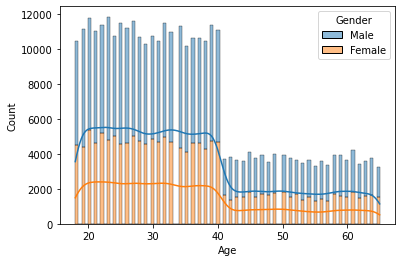

In [29]:
sns.histplot(data=df1, x=AGE, hue=GENDER, multiple="stack",kde=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

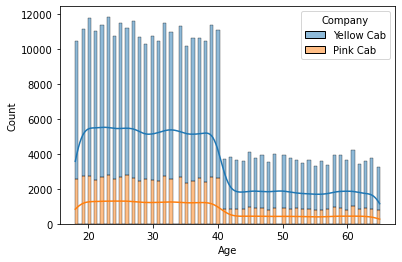

In [53]:
sns.histplot(data=df1, x=AGE, hue=COMPANY, multiple="stack",kde=True)

<AxesSubplot:xlabel='Company', ylabel='Count'>

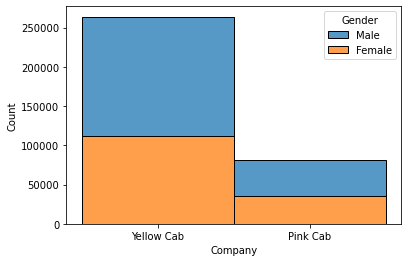

In [30]:
sns.histplot(data=df1, x=COMPANY, hue=GENDER, multiple="stack")

<AxesSubplot:xlabel='Payment_Mode', ylabel='Count'>

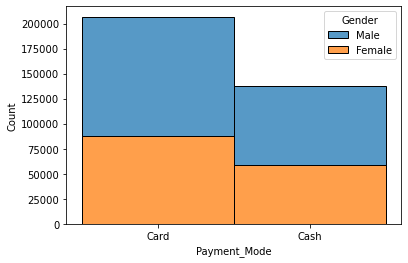

In [31]:
sns.histplot(data=df1, x=PAYMENT_MODE, hue=GENDER, multiple="stack")

<AxesSubplot:xlabel='Income(USD/Month)', ylabel='Count'>

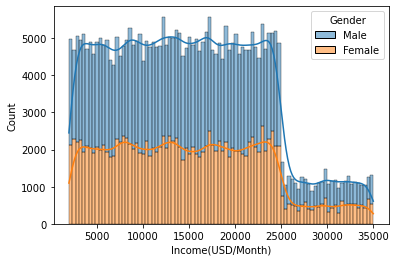

In [32]:
sns.histplot(data=df1, x=INCOME, hue=GENDER, multiple="stack",kde=True)

<AxesSubplot:xlabel='Income(USD/Month)', ylabel='Age'>

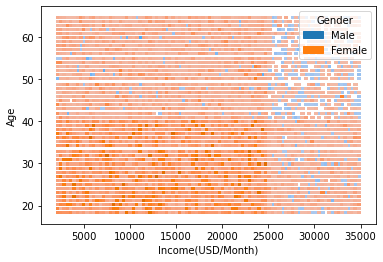

In [33]:
sns.histplot(data=df1, x=INCOME,y=AGE, hue=GENDER, multiple="stack",kde=True)

<AxesSubplot:xlabel='Count', ylabel='City'>

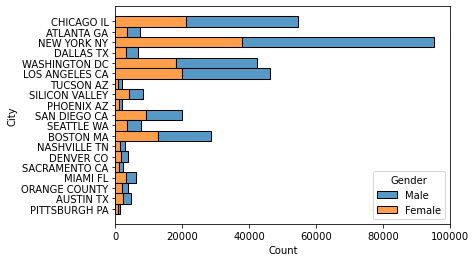

In [34]:
sns.histplot(data=df1, y=CITY, hue=GENDER, multiple="stack")

<AxesSubplot:xlabel='Gender', ylabel='KM_Travelled'>

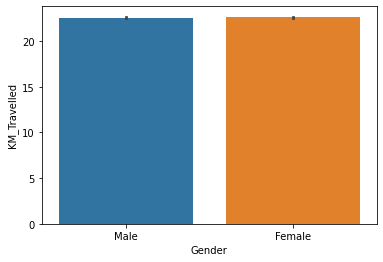

In [35]:
sns.barplot(x=GENDER, y=KM_TRAVELLED, data=df1)

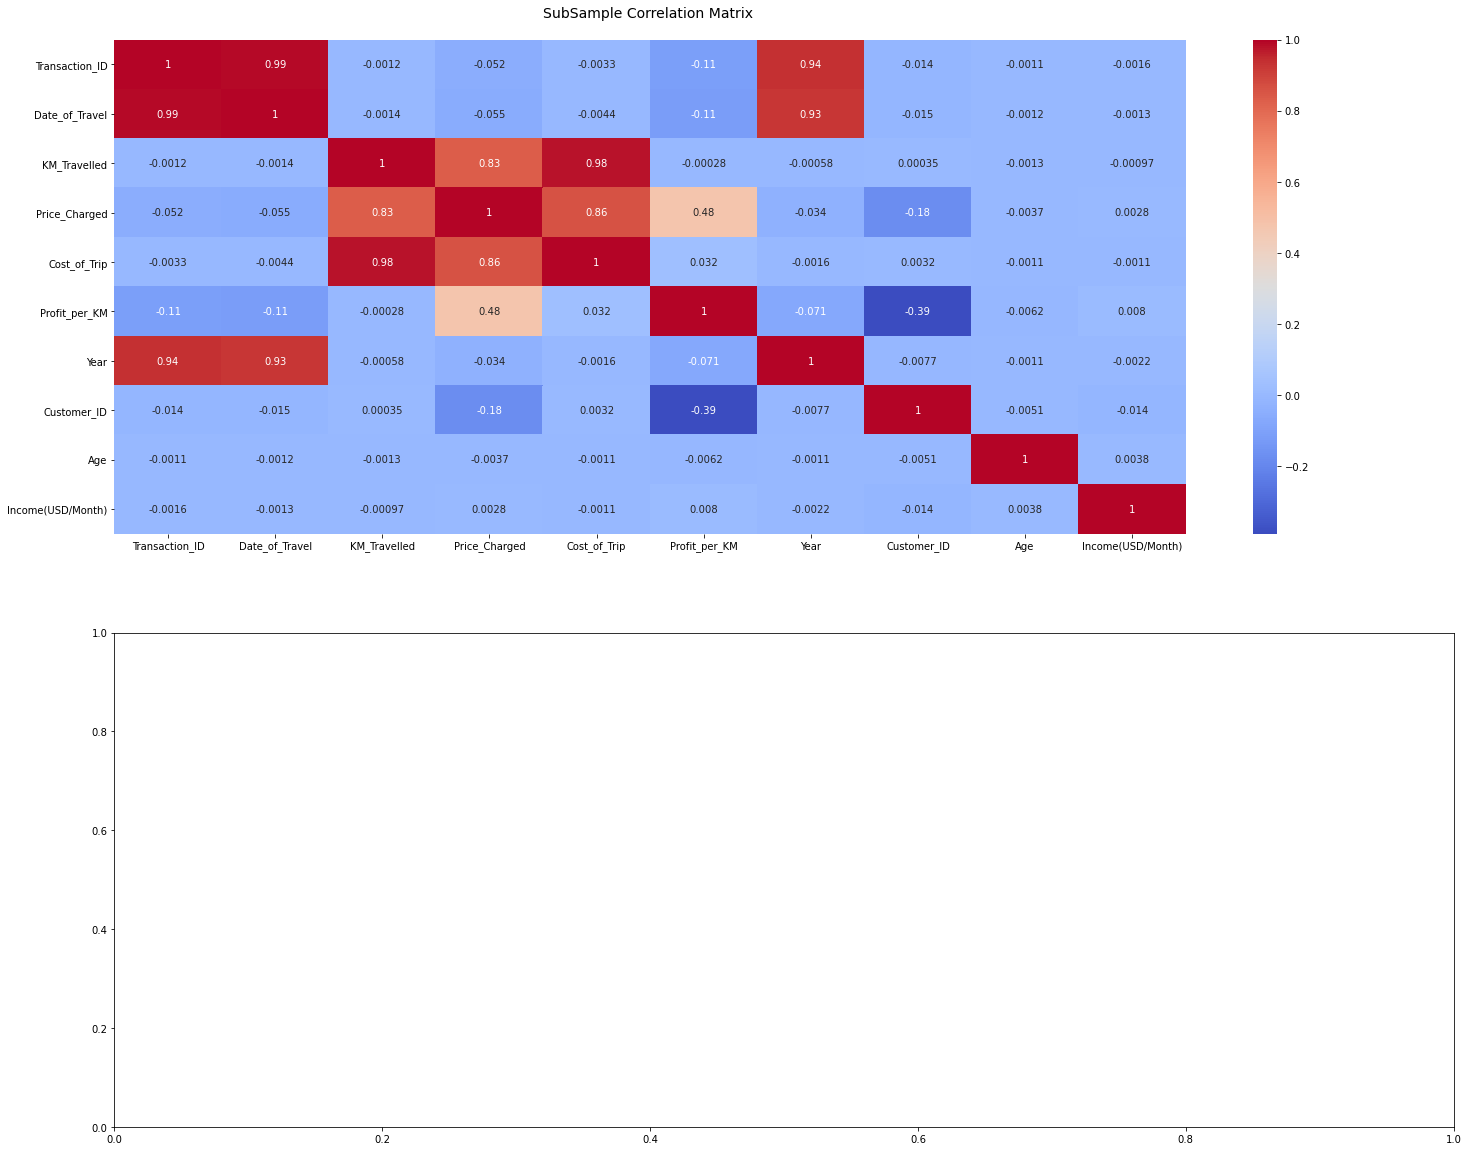

In [36]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))
sns.heatmap(df1.corr(),cmap="coolwarm",annot=True, annot_kws={'size':10},ax=ax1)
ax1.set_title('SubSample Correlation Matrix \n ', fontsize=14)
plt.show()

In [51]:
# One-way ANOVA test




from scipy import stats
from scipy.stats import chi2, norm
 
anova_result = stats.f_oneway(df1.loc[: , TRANSACTION_ID], df1.loc[: , DATE_OF_TRAVEL])
print('Can we reject H0 on One-way ANOVA?', 'Yes' if anova_result.pvalue<0.01 else 'No')


print('Is there a reliable difference? Almost certainly..')
print('(There is a {}% chance of falsely obtaining this result)'.format(anova_result.pvalue*100))

#Kruskal Wallis test

from scipy import stats
from scipy.stats import chi2, norm
kw_result = stats.kruskal(df1.loc[: , TRANSACTION_ID], df1.loc[: , DATE_OF_TRAVEL])
print('Can we reject H0 on Kruskal Wallis?', 'Yes' if kw_result.pvalue<0.01 else 'No')


print('Is there a reliable difference? Almost certainly..')
print('(There is a {}% chance of falsely obtaining this result)'.format(kw_result.pvalue*100))

# Chi-square test
cs_result = stats.chisquare(df1.loc[: , TRANSACTION_ID], df1.loc[: , DATE_OF_TRAVEL])
print('Can we reject H0 on Chi-square?', 'Yes' if cs_result.pvalue<0.01 else 'No')


print('Is there a reliable difference? Almost certainly..')
print('(There is a {}% chance of falsely obtaining this result)'.format(cs_result.pvalue*100))

#Mann-Whitney test
mwu_result = stats.mannwhitneyu(df1.loc[: , TRANSACTION_ID], df1.loc[: , DATE_OF_TRAVEL])
print('Can we reject H0 on Mann-Whitney?', 'Yes' if mwu_result.pvalue<0.01 else 'No')


print('Is there a reliable difference? Almost certainly..')
print('(There is a {}% chance of falsely obtaining this result)'.format(mwu_result.pvalue*100))

#McNemar's test

def mcnemar(x, y):
    n1 = np.sum(x < y)
    n2 = np.sum(x > y)
    stat = (np.abs(n1-n2)-1)**2 / (n1+n2)
    df = 1
    pval = chi2.sf(stat,1)
    return stat, pval

print('\nCan we reject H0 on McNemar test?', 'Yes' if mcnemar(df1.loc[: , TRANSACTION_ID], df1.loc[: , DATE_OF_TRAVEL])[1]<0.05 else 'No')


#p-hacking

N = 1000
G_mu, G_sigma = 155, 40
L_mu, L_sigma = 150, 40

def run_experiment():
    
    return stats.ttest_ind(df1.loc[: , TRANSACTION_ID], df1.loc[: , DATE_OF_TRAVEL]).pvalue*0.5 # one-tailed for testing G_mu > L_mu

# 1 - 
NUM_EXPTS = 10000
pvalues = [run_experiment() for _ in range(NUM_EXPTS)]

# 2 -
ALPHA = 0.05
print('We fail to reject H0 {:.0f}% of the time.'.format(100*sum([1 if p>ALPHA else 0 for p in pvalues])/NUM_EXPTS))

# 3 - You can also run multiple times. The result varies with different samples even though it's generated from the same population!

# 4 - Try increasing N above to 10000.

Can we reject H0 on One-way ANOVA? Yes
Is there a reliable difference? Almost certainly..
(There is a 0.0% chance of falsely obtaining this result)
Can we reject H0 on Kruskal Wallis? Yes
Is there a reliable difference? Almost certainly..
(There is a 0.0% chance of falsely obtaining this result)
Can we reject H0 on Chi-square? Yes
Is there a reliable difference? Almost certainly..
(There is a 0.0% chance of falsely obtaining this result)
Can we reject H0 on Mann-Whitney? Yes
Is there a reliable difference? Almost certainly..
(There is a 0.0% chance of falsely obtaining this result)

Can we reject H0 on McNemar test? Yes
We fail to reject H0 0% of the time.


In [52]:
# One-way ANOVA test




from scipy import stats
from scipy.stats import chi2, norm
 
anova_result = stats.f_oneway(df1.loc[: , PRICE_CHARGED], df1.loc[: , PROFIT_PER_KM])
print('Can we reject H0 on One-way ANOVA?', 'Yes' if anova_result.pvalue<0.01 else 'No')


print('Is there a reliable difference? Almost certainly..')
print('(There is a {}% chance of falsely obtaining this result)'.format(anova_result.pvalue*100))

#Kruskal Wallis test

from scipy import stats
from scipy.stats import chi2, norm
kw_result = stats.kruskal(df1.loc[: , PRICE_CHARGED], df1.loc[: , PROFIT_PER_KM])
print('Can we reject H0 on Kruskal Wallis?', 'Yes' if kw_result.pvalue<0.01 else 'No')


print('Is there a reliable difference? Almost certainly..')
print('(There is a {}% chance of falsely obtaining this result)'.format(kw_result.pvalue*100))

# Chi-square test
cs_result = stats.chisquare(df1.loc[: , PRICE_CHARGED], df1.loc[: , PROFIT_PER_KM])
print('Can we reject H0 on Chi-square?', 'Yes' if cs_result.pvalue<0.01 else 'No')


print('Is there a reliable difference? Almost certainly..')
print('(There is a {}% chance of falsely obtaining this result)'.format(cs_result.pvalue*100))

#Mann-Whitney test
mwu_result = stats.mannwhitneyu(df1.loc[: , PRICE_CHARGED], df1.loc[: , PROFIT_PER_KM])
print('Can we reject H0 on Mann-Whitney?', 'Yes' if mwu_result.pvalue<0.01 else 'No')


print('Is there a reliable difference? Almost certainly..')
print('(There is a {}% chance of falsely obtaining this result)'.format(mwu_result.pvalue*100))

#McNemar's test

def mcnemar(x, y):
    n1 = np.sum(x < y)
    n2 = np.sum(x > y)
    stat = (np.abs(n1-n2)-1)**2 / (n1+n2)
    df = 1
    pval = chi2.sf(stat,1)
    return stat, pval

print('\nCan we reject H0 on McNemar test?', 'Yes' if mcnemar(df1.loc[: , PRICE_CHARGED], df1.loc[: , PROFIT_PER_KM])[1]<0.05 else 'No')

#p-hacking

N = 1000
G_mu, G_sigma = 155, 40
L_mu, L_sigma = 150, 40

def run_experiment():
    
    return stats.ttest_ind(df1.loc[: , PRICE_CHARGED], df1.loc[: , PROFIT_PER_KM]).pvalue*0.5 # one-tailed for testing G_mu > L_mu

# 1 - 
NUM_EXPTS = 10000
pvalues = [run_experiment() for _ in range(NUM_EXPTS)]

# 2 -
ALPHA = 0.05
print('We fail to reject H0 {:.0f}% of the time.'.format(100*sum([1 if p>ALPHA else 0 for p in pvalues])/NUM_EXPTS))

# 3 - You can also run multiple times. The result varies with different samples even though it's generated from the same population!

# 4 - Try increasing N above to 10000.

Can we reject H0 on One-way ANOVA? Yes
Is there a reliable difference? Almost certainly..
(There is a 0.0% chance of falsely obtaining this result)
Can we reject H0 on Kruskal Wallis? Yes
Is there a reliable difference? Almost certainly..
(There is a 0.0% chance of falsely obtaining this result)
Can we reject H0 on Chi-square? Yes
Is there a reliable difference? Almost certainly..
(There is a 0.0% chance of falsely obtaining this result)


C:\Users\denis\anaconda3\lib\site-packages\scipy\stats\stats.py:6125: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs.astype(np.float64) - f_exp)**2 / f_exp


Can we reject H0 on Mann-Whitney? Yes
Is there a reliable difference? Almost certainly..
(There is a 0.0% chance of falsely obtaining this result)

Can we reject H0 on McNemar test? Yes
We fail to reject H0 0% of the time.


In [ ]:
# No correlation between any features


In [ ]:
# Hypothesis results:
# 1. Male focused cab services exept in Phoenix AZ, Sacramento CA, Silicon Valley an Pittsburgh PA
# 2. Top 5 highest density of users in population are in San Francisco, Washington DC, Boston MA, Los Angeles CA, Chicago IL
# 3. Highest number of users are male between 20 and 40
# 4. Most users are male over 40 lower than female under 40
# 5. Most users are males with income under 2500 USD/Month
# 6. 2018 saw lower numbers than 2017

In [ ]:
# Recommandations:
# Based on the evaluation of the data, we believe Yellow cab is a better investment than Pink cab. Yellow cab is more used in the majority of the cities exept four. The same cab company is used by 
# young individuals from lower income. In San Francisco, a female marketing strategy would be recommended moving forward, while in the rest of the cities, a more male orientated strategy should
# work. The prices for the trips should be low, without eating too musch from the profits. Although there was a remarkable growth in the Cab Industry in last few years, 2018 saw less 
# cab uses than in 2017. But not by much.
# With all those in mind we will recommend Yellow cab for investment.